## DBSCAN
#### Why use DBSCAN?

DBSCAN is a density-based clustering algorithm. defines clusters as continuous regions of high density. It is a non-parametric algorithm, which means that it does not require the user to specify the number of clusters. It is also robust to outliers and noise. It is a very popular algorithm for clustering in data mining.

* For each instance the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

* If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.

* All instances in the neighborhood of a core instance belong to the same cluster. Therefore, a cluster is a set of core instances that are located within a short distance from each other (i.e., their ε-neighborhoods overlap).

* Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

x, y  = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x)

print(np.unique(dbscan.labels_)) ## the instances that are considered anomalies are labeled as -1

[-1  0  1  2  3  4  5  6]


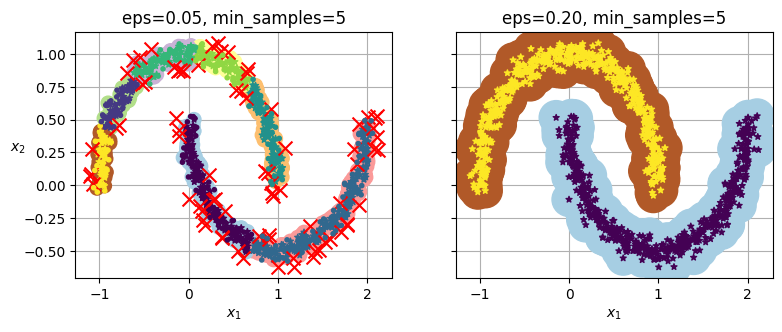

In [3]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")

    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])

    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)

    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(x)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, x, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, x, size=600, show_ylabels=False)

plt.show()


#### DBScan does not have a predict method, but it does have a fit_predict method that returns the cluster labels for each instance.
##### So, you can use KNeighborsClassifier to cluster the instances in each cluster:

C:\Users\rbblazquez\AppData\Local\Temp\ipykernel_20840\3223376806.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1],  s=100, cmap="Paired")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


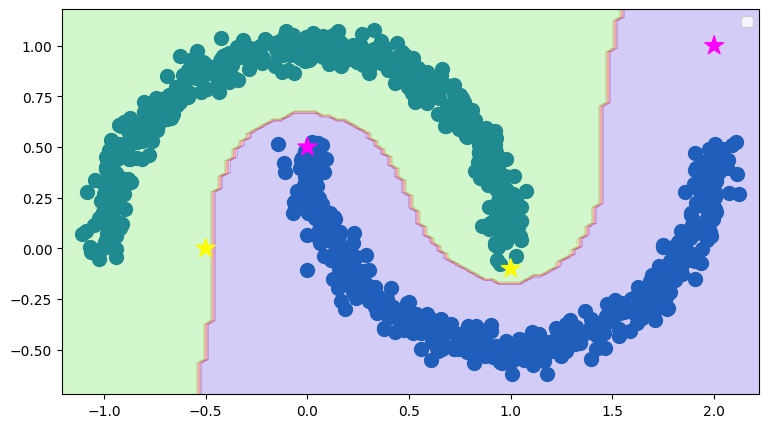

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
y_pred = knn.predict(X_new)

plt.figure(figsize=(9, 5))

plt.scatter(x[:, 0], x[:, 1],  s=100, cmap="Paired")

mins = x.min(axis=0) - 0.1
maxs = x.max(axis=0) + 0.1

x0s = np.linspace(mins[0], maxs[0], 100)
x1s = np.linspace(mins[1], maxs[1], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred_2 = knn.predict(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred_2, cmap=plt.cm.brg, alpha=0.2)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred, marker="*", s=200, cmap="spring")

plt.legend()
plt.show()